In [1]:
from __future__ import print_function, division
from matplotlib import pyplot as plt

import matplotlib.pyplot
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# import the datasets

In [2]:
df_original = pd.read_csv('Starbucks satisfactory survey.csv')
df_original1 = pd.read_csv('Starbucks satisfactory survey encode cleaned.csv')

In [3]:
df_original1.shape

(113, 33)

In [4]:
print(df_original1.head(10))

   Id  gender  age  status  income  visitNo  method  timeSpend  location  \
0   1       1    1       0       0        3       0          1         0   
1   2       1    1       0       0        3       2          0         1   
2   3       0    1       2       0        2       0          1         2   
3   4       1    1       0       0        3       2          0         2   
4   5       0    1       0       0        2       2          1         1   
5   6       1    1       0       0        3       0          1         2   
6   7       1    1       0       0        3       0          0         0   
7   8       0    1       2       2        3       0          1         2   
8   9       1    1       0       0        3       1          0         2   
9  10       0    1       2       0        2       2          0         2   

   membershipCard  ...  chooseRate  promoMethodApp  promoMethodSoc  \
0               0  ...           3               1               1   
1               0  ... 

In [5]:
df_original1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

In [6]:
#set Id as index
df = df_original1.set_index('Id', inplace = False)

In [7]:
df.describe()

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,...,113.000000,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000
mean,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,1.0,...,3.539823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540
std,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,0.0,...,1.026744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.0,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.0,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
max,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,1.0,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


In [8]:
# checking for null values
df.isnull().sum()

gender                    0
age                       0
status                    0
income                    0
visitNo                   0
method                    0
timeSpend                 0
location                  0
membershipCard            0
itemPurchaseCoffee        0
itempurchaseCold          0
itemPurchasePastries      0
itemPurchaseJuices        0
itemPurchaseSandwiches    0
itemPurchaseOthers        0
spendPurchase             0
productRate               0
priceRate                 0
promoRate                 0
ambianceRate              0
wifiRate                  0
serviceRate               0
chooseRate                0
promoMethodApp            0
promoMethodSoc            0
promoMethodEmail          0
promoMethodDeal           0
promoMethodFriend         0
promoMethodDisplay        0
promoMethodBillboard      0
promoMethodOthers         0
loyal                     0
dtype: int64

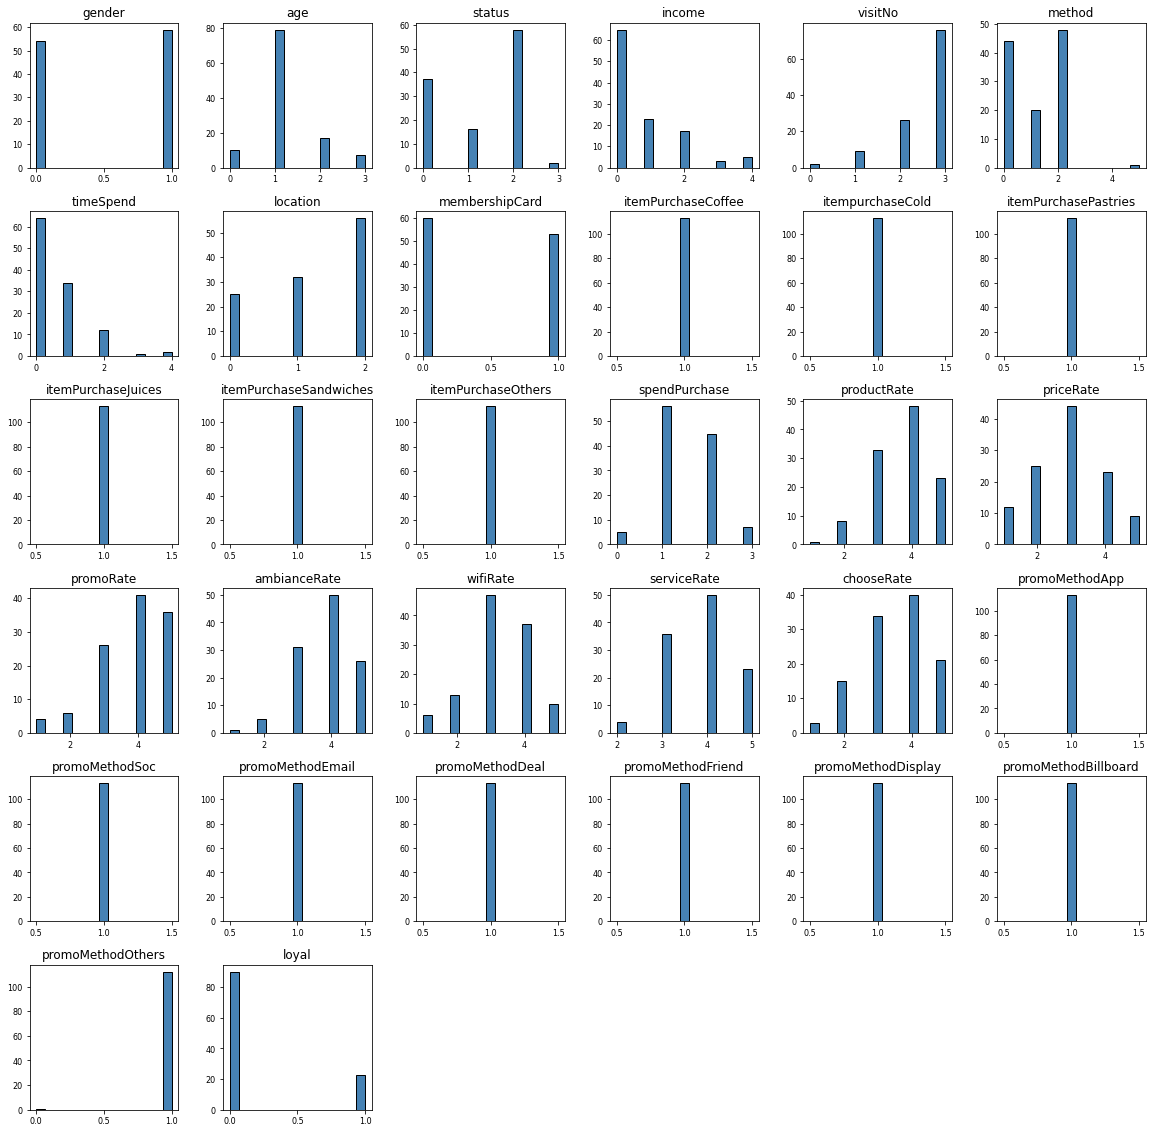

In [56]:
df.hist(bins = 15, color = "steelblue", edgecolor = "black", linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False, figsize = (20,20))
plt.show()

<AxesSubplot:>

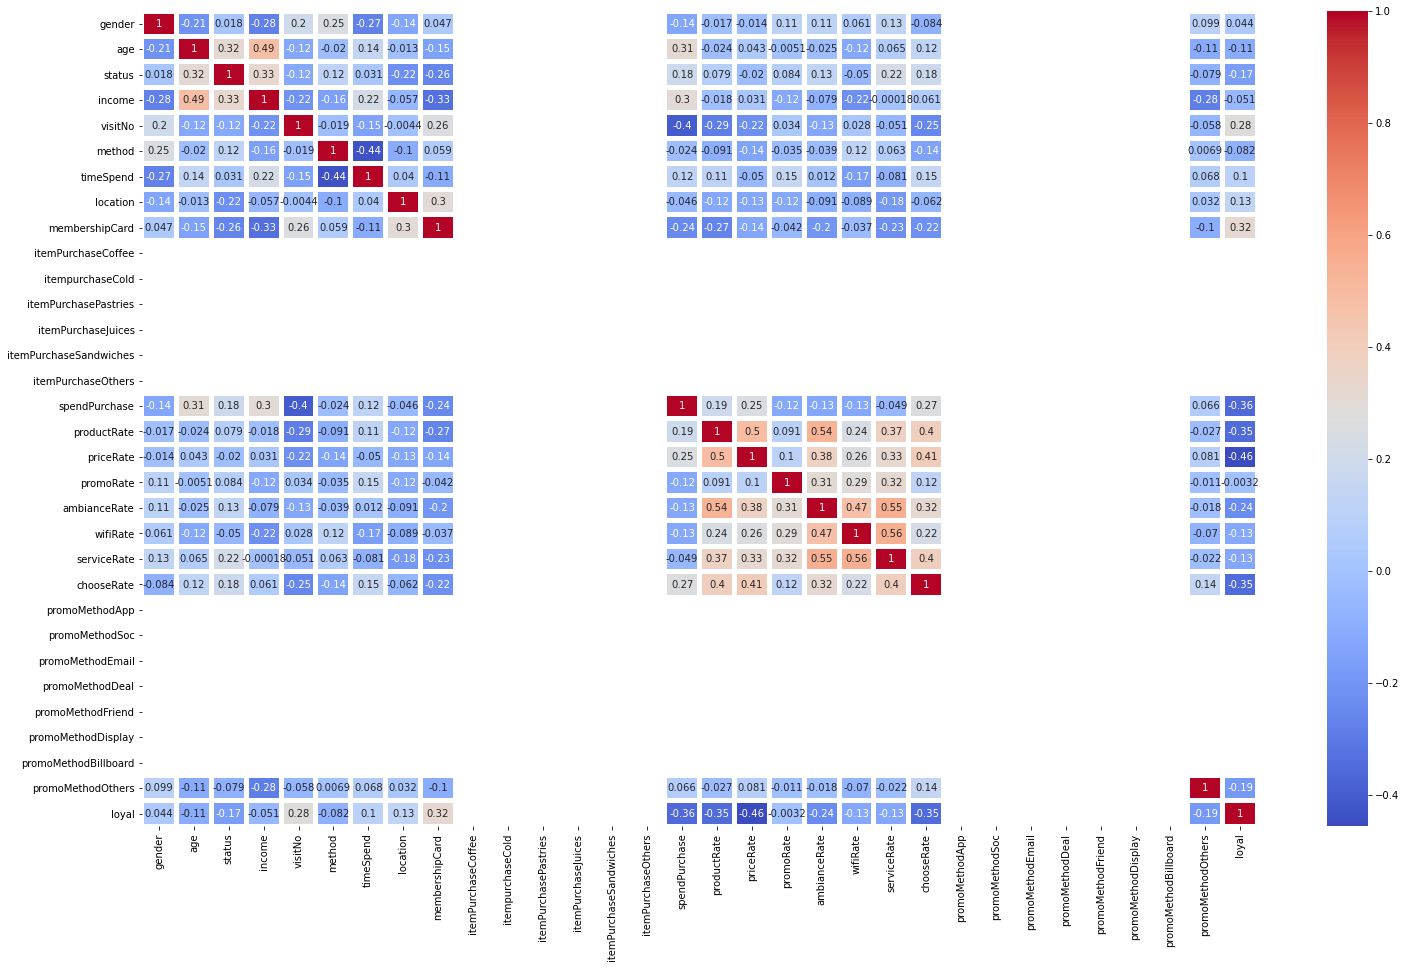

In [54]:
#heatmap correlation
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=4)

In [55]:
df.corr()['loyal'].sort_values()

priceRate                -0.46
spendPurchase            -0.36
chooseRate               -0.35
productRate              -0.35
ambianceRate             -0.24
promoMethodOthers        -0.19
status                   -0.17
serviceRate              -0.13
wifiRate                 -0.13
age                      -0.11
method                   -0.08
income                   -0.05
promoRate                -0.00
gender                    0.04
timeSpend                 0.10
location                  0.13
visitNo                   0.28
membershipCard            0.32
loyal                     1.00
itemPurchaseCoffee         NaN
itempurchaseCold           NaN
itemPurchasePastries       NaN
itemPurchaseJuices         NaN
itemPurchaseSandwiches     NaN
itemPurchaseOthers         NaN
promoMethodApp             NaN
promoMethodSoc             NaN
promoMethodEmail           NaN
promoMethodDeal            NaN
promoMethodFriend          NaN
promoMethodDisplay         NaN
promoMethodBillboard       NaN
Name: lo

# Preliminary Analysis

## Variable importance

### Random Forest Classifier for features selection

In [11]:
from sklearn.preprocessing import MinMaxScaler
features = df[df.columns.difference(['loyal'])]
labels = df['loyal']

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [13]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
14,priceRate,0.193635
15,productRate,0.099997
2,chooseRate,0.090620
26,spendPurchase,0.066371
28,timeSpend,0.058821
1,ambianceRate,0.056515
12,membershipCard,0.050999
24,promoRate,0.049160
27,status,0.047227
30,wifiRate,0.045708


### Recursive Feature Elimination

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

Selected[Selected['RFE'] == True]

,index,RFE
0,age,True
1,ambianceRate,True
2,chooseRate,True
3,gender,True
4,income,True
6,itemPurchaseJuices,True
7,itemPurchaseOthers,True
11,location,True
12,membershipCard,True
13,method,True


### Extra trees classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.02648403 0.05860026 0.07728199 0.03530007 0.03188661 0.
 0.         0.         0.         0.         0.         0.03526181
 0.06330004 0.04996131 0.13186648 0.08458118 0.         0.
 0.         0.         0.         0.         0.01451895 0.
 0.05689092 0.05501762 0.0823305  0.04066134 0.06586177 0.03903072
 0.0511644 ]


In [16]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
14,priceRate,0.131866
15,productRate,0.084581
26,spendPurchase,0.082330
2,chooseRate,0.077282
28,timeSpend,0.065862
12,membershipCard,0.063300
1,ambianceRate,0.058600
24,promoRate,0.056891
25,serviceRate,0.055018
30,wifiRate,0.051164


###  Chisquare

In [17]:
df1 = df.copy()

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df1[i] = d[i].transform(df1[i])
    
features1 = df1[df1.columns.difference(['loyal'])]
labels1 = df1['loyal']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features1, labels1)

import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)

[ 0.49354676  1.67505681  5.79209379  0.10271023  0.44988765         nan
         nan         nan         nan         nan         nan  0.94236447
  6.05437061  0.53788008 14.16208837  3.95457223         nan         nan
         nan         nan         nan         nan  0.03493789         nan
  0.00042958  0.67198303  4.46227545  2.24603025  1.3989288   1.79758454
  0.72675168]


In [18]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features1.columns)

chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
14,priceRate,14.16
12,membershipCard,6.05
2,chooseRate,5.79
26,spendPurchase,4.46
15,productRate,3.95
27,status,2.25
29,visitNo,1.80
1,ambianceRate,1.68
28,timeSpend,1.40
11,location,0.94


### Lasso ridge for feature selection

In [19]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)

l1 = l1.reset_index()
l1[l1['L1'] == True]

,index,L1
2,chooseRate,True
14,priceRate,True
15,productRate,True


### Results compilation

In [20]:
from functools import reduce
dfs = [VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
final_results.head()

,index,RF,RFE,Extratrees,Chi_Square,L1
0,age,0.02,True,0.03,0.49,False
1,ambianceRate,0.06,True,0.06,1.68,False
2,chooseRate,0.09,True,0.08,5.79,True
3,gender,0.03,True,0.04,0.10,False
4,income,0.03,True,0.03,0.45,False


In [21]:
columns = [ 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)
score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0)

,index,RF,Extratrees,Chi_Square,RFE,L1,final_score
15,productRate,1,1,1,1,1,5
2,chooseRate,1,1,1,1,1,5
14,priceRate,1,1,1,1,1,5
26,spendPurchase,1,1,1,1,0,4
28,timeSpend,1,1,0,1,0,3
12,membershipCard,0,0,1,1,0,2
13,method,0,0,0,1,0,1
29,visitNo,0,0,0,1,0,1
27,status,0,0,0,1,0,1
25,serviceRate,0,0,0,1,0,1


## Models

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.metrics import f1_score, recall_score

In [23]:
def PrintStats(cmat, y_test, pred):
   # separate out the confusion matrix components
   tpos = cmat[0][0]
   fneg = cmat[1][1]
   fpos = cmat[0][1]
   tneg = cmat[1][0]
   # calculate F!, Recall scores
   f1Score = round(f1_score(y_test, pred), 2)
   recallScore = round(recall_score(y_test, pred), 2)
   # calculate and display metrics
   print(cmat)
   print( 'Accuracy: '+ str(np.round(100*float(tpos+fneg)/float(tpos+fneg + fpos + tneg),2))+'%')
   print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, pred),3)))
   print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
   print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))

In [24]:
def RunModel(model, X_train, y_train, X_test, y_test):
   model.fit(X_train, y_train.values.ravel())
   pred = model.predict(X_test)
   matrix = confusion_matrix(y_test, pred)
   return matrix, pred

In [25]:
print(df.loyal.value_counts())

0    90
1    23
Name: loyal, dtype: int64


In [26]:
data_features = df.drop(columns =['promoMethodEmail','promoMethodFriend','itempurchaseCold', 'promoMethodSoc', 'itemPurchasePastries', 'promoMethodDisplay','promoMethodDeal','itemPurchaseCoffee','promoMethodBillboard','promoMethodApp','itemPurchaseSandwiches','loyal'])
data_target = df.loyal
data_features.shape, data_target.shape

((113, 20), (113,))

In [27]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features,    data_target, train_size=0.65, test_size=0.35, random_state=1)


### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[31  3]
 [ 3  3]]
Accuracy: 85.0%
Cohen Kappa: 0.412
Sensitivity/Recall for Model : 0.5
F1 Score for Model : 0.5


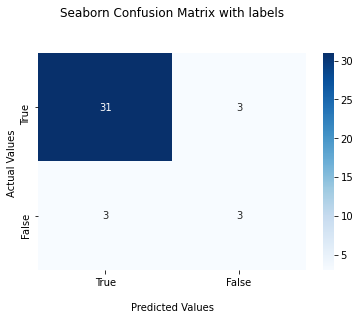

In [29]:
#plot confusion 
import seaborn as sns

ax = sns.heatmap(cmat, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

31 customers were classified as loyal that were actually loyal
3 customers were classified as not loyal that were actually loyal (type 1 error)
3 customers were classified as loyal that were not loyal (type 2 error)
3 customers were classified as not loyal that were not loyal

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, n_jobs =5)
cmat, pred = RunModel(rf, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[32  2]
 [ 3  3]]
Accuracy: 87.5%
Cohen Kappa: 0.474
Sensitivity/Recall for Model : 0.5
F1 Score for Model : 0.55


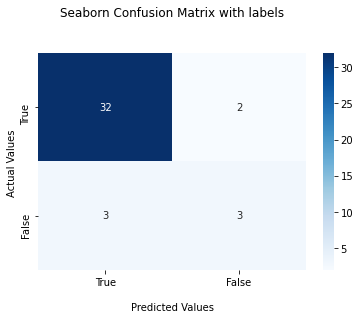

In [31]:
import seaborn as sns

ax = sns.heatmap(cmat, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support vector classifier

In [32]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
cmat, pred = RunModel(clf, X_train, y_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

[[32  2]
 [ 2  4]]
Accuracy: 90.0%
Cohen Kappa: 0.608
Sensitivity/Recall for Model : 0.67
F1 Score for Model : 0.67


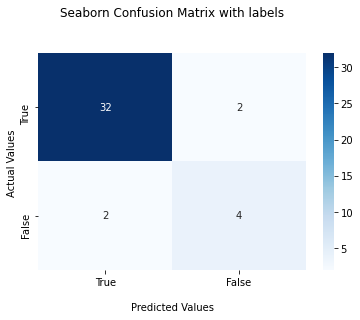

In [33]:
import seaborn as sns

ax = sns.heatmap(cmat, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

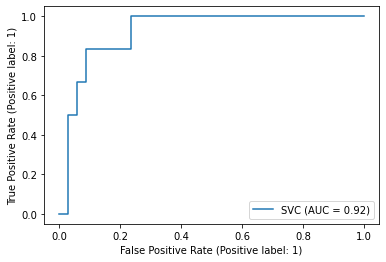

In [35]:
# Roc plot and AUC calculation
from sklearn import metrics
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

## Bagging

In [36]:
# Let's try bagging to improve svm model accuracy with bagging
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
B_clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=1).fit(X_train, y_train)
y_pred = B_clf.predict(X_test)

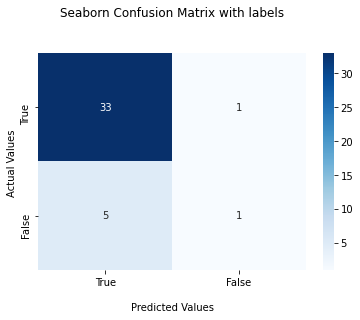

In [37]:
# Let's plot the confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#plot 
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
# Let's print a classification report 
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.50      0.17      0.25         6

    accuracy                           0.85        40
   macro avg       0.68      0.57      0.58        40
weighted avg       0.81      0.85      0.82        40



In [39]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 Score for Model:",f1_score(y_test, y_pred))
print("Sensitivity/Recall for Model:",recall_score(y_test, y_pred))

Accuracy: 0.85
F1 Score for Model: 0.25
Sensitivity/Recall for Model: 0.16666666666666666


## Adaboost Classification

In [49]:
from sklearn import model_selection 
from sklearn.ensemble import AdaBoostClassifier
seed = 1
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed).fit(X_train, y_train)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7928571428571428


In [50]:
y_pred = model.predict(X_test)

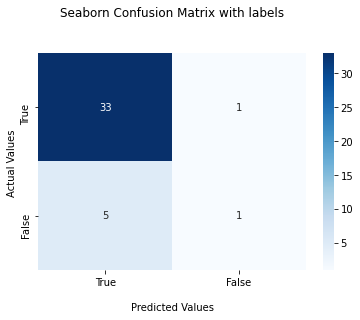

In [42]:
# Let's plot the confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#plot 
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [43]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 Score for Model:",f1_score(y_test, y_pred))
print("Sensitivity/Recall for Model:",recall_score(y_test, y_pred))

Accuracy: 0.85
F1 Score for Model: 0.25
Sensitivity/Recall for Model: 0.16666666666666666


## Ensemble Learning

In [44]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [45]:
# kfold 
kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators).fit(X_train, y_train)
results = model_selection.cross_val_score(ensemble,X_train, y_train, cv=kfold)
print(results.mean())

0.8107142857142857


In [46]:
y_pred = ensemble.predict(X_test)

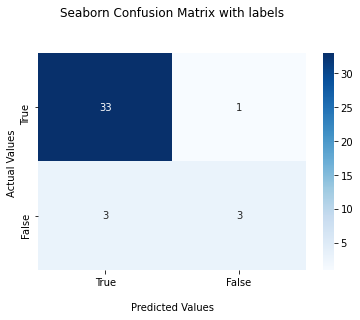

In [47]:
# Let's plot the confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#plot 
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 Score for Model:",f1_score(y_test, y_pred))
print("Sensitivity/Recall for Model:",recall_score(y_test, y_pred))

Accuracy: 0.9
F1 Score for Model: 0.6
Sensitivity/Recall for Model: 0.5
